## **Importar bibliotecas**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## **Ler imagens**

In [2]:
def input_image(img_path, is_gray=False):
   img = cv2.imread(img_path)
   img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if is_gray else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
   return img_new

In [3]:
img_gray1 = input_image(os.path.join("..", "Imagens", "Cameraman.jpg"), is_gray=True)

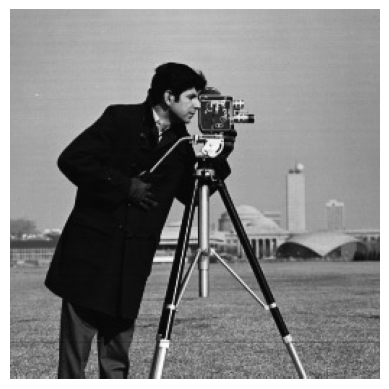

In [4]:
plt.imshow(img_gray1, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

## Vizinhança

\begin{bmatrix}
(x-1,y-1) & (x-1,y) & (x-1,y+1)\\
(x, y-1) & \textbf{(x, y)} & (x, y+1) \\
(x+1, y-1) & (x+1,y) & (x+1, y+1)
\end{bmatrix}

In [68]:
img_gray1.shape

(256, 256)

In [69]:
m, n = img_gray1.shape[0]//2, img_gray1.shape[1]//2

In [ ]:
print(m)
print(n)

128
128


In [78]:
viz_5x5 = img_gray1[0:5, 0:5]
viz_5x5

array([[156, 157, 157, 157, 157],
       [158, 158, 158, 158, 158],
       [158, 158, 157, 157, 157],
       [157, 156, 157, 157, 158],
       [156, 155, 156, 158, 159]], dtype=uint8)

In [79]:
viz_5x5.shape

(5, 5)

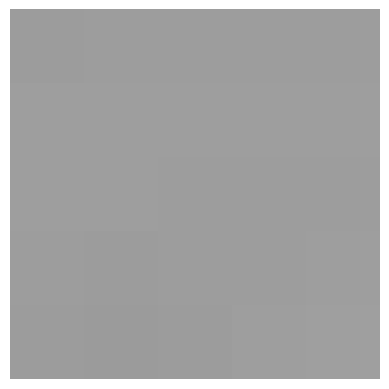

In [92]:
plt.imshow(viz_5x5, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [89]:
viz1_5x5 = img_gray1[m:m+5, n:m+5]
viz1_5x5

array([[ 19,  11,  15,  69,  91],
       [ 15,  17,  15,  70,  87],
       [ 13,  25,  17,  72,  86],
       [ 14,  27,  17,  73,  91],
       [ 13,  20,  15,  71, 101]], dtype=uint8)

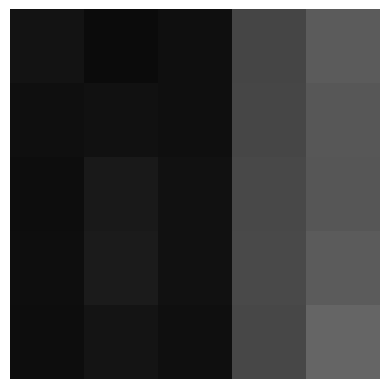

In [91]:
plt.imshow(viz1_5x5, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

### Padding

In [39]:
#preencher a borda da imagem -- constante
img_pad1 = np.pad(img_gray, pad_width=(2,2))

In [40]:
img_pad1.shape

(260, 260)

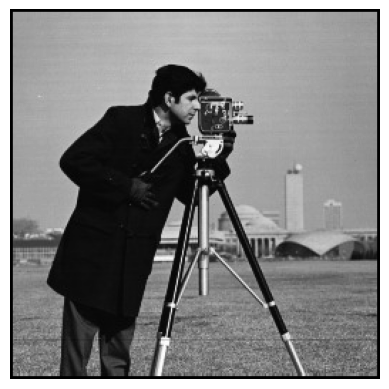

In [41]:
plt.imshow(img_pad1, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [44]:
#preencher a borda da imagem -- edge
img_pad2 = np.pad(img_gray, pad_width=(2,2), mode="edge")

In [45]:
img_pad2.shape

(260, 260)

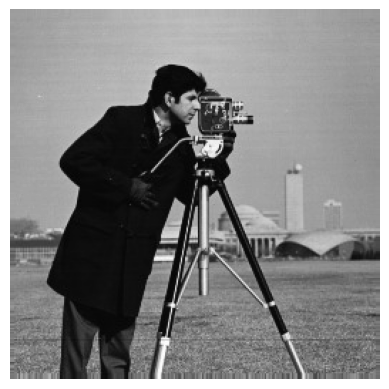

In [47]:
plt.imshow(img_pad2, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [51]:
#preencher a borda da imagem -- reflect
img_pad3 = np.pad(img_gray1, pad_width=(10,10), mode="reflect")

In [53]:
img_pad3.shape

(276, 276)

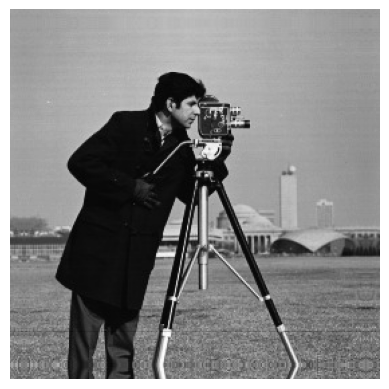

In [54]:
plt.imshow(img_pad3, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

## Convolução

$R = w_1 x_1 + w_2 x_2 + ... + w_n x_n = \sum_{i=1}^{n} w_i x_i$

Sendo $w$ uma máscara genérica, o exemplo de uma máscara $w$:

Para uma imagem $f(x,y)$ a convolução gera uma imagem $g(x,y)$

$g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) f(x-s,y-t)$

**Algoritmo de convolução de definido da seguinte forma:**

In [5]:
def conv(f, w):
    '''
        Função que executa a convolução em uma imagem
        params:
            - f: (np.array) imagem de entrada
            - w: mascara de convolução
        return:
            - imagem g com convolução
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w.shape
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #flip filtro
    w_flip = np.flip(np.flip(w, 0) , 1)
    #cria uma imagem g similar a f
    g = np.array(f, copy=True)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.sum(np.multiply(f[x-a: x+a+1, y-b:y+b+1], w_flip))
    
    return g.astype(np.uint8)

In [6]:
#importar a imagem
img_gray = input_image(os.path.join("..", "Imagens", "parttern.png"), is_gray=True)

In [7]:
# mascara aleatória
w = np.array([[ 0, -1,  0], 
              [-1,  4, -1], 
              [ 0, -1,  0]])
w

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [8]:
#aplicar a convolução
conv_img = conv(img_gray, w)

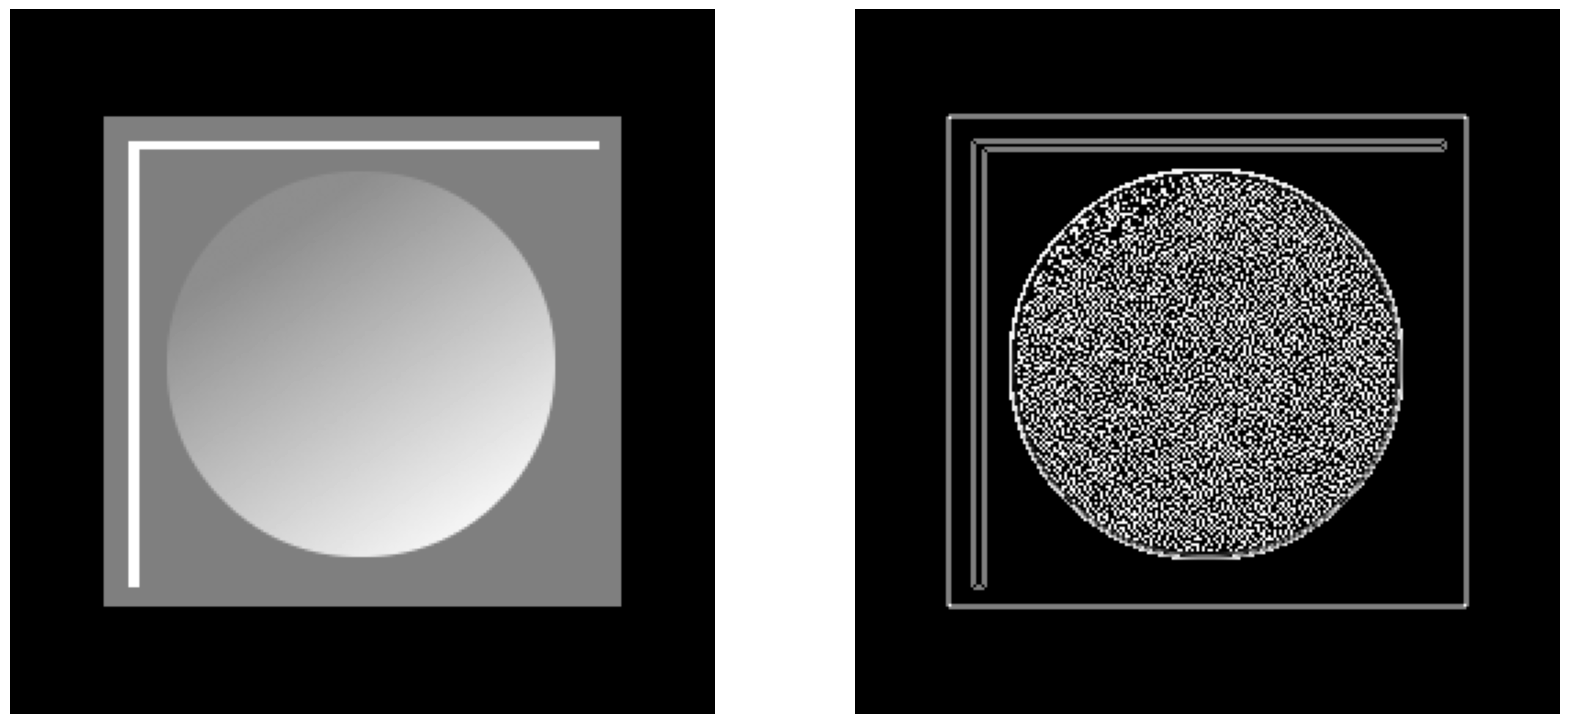

In [9]:
plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(conv_img,vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

**Convolução para o destaque de bordas verticais**

In [10]:
w_vertical = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])
w_vertical

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [11]:
np.flip(np.flip(w_vertical, 0), 1)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [12]:
conv_vertical = conv(img_gray, w_vertical)

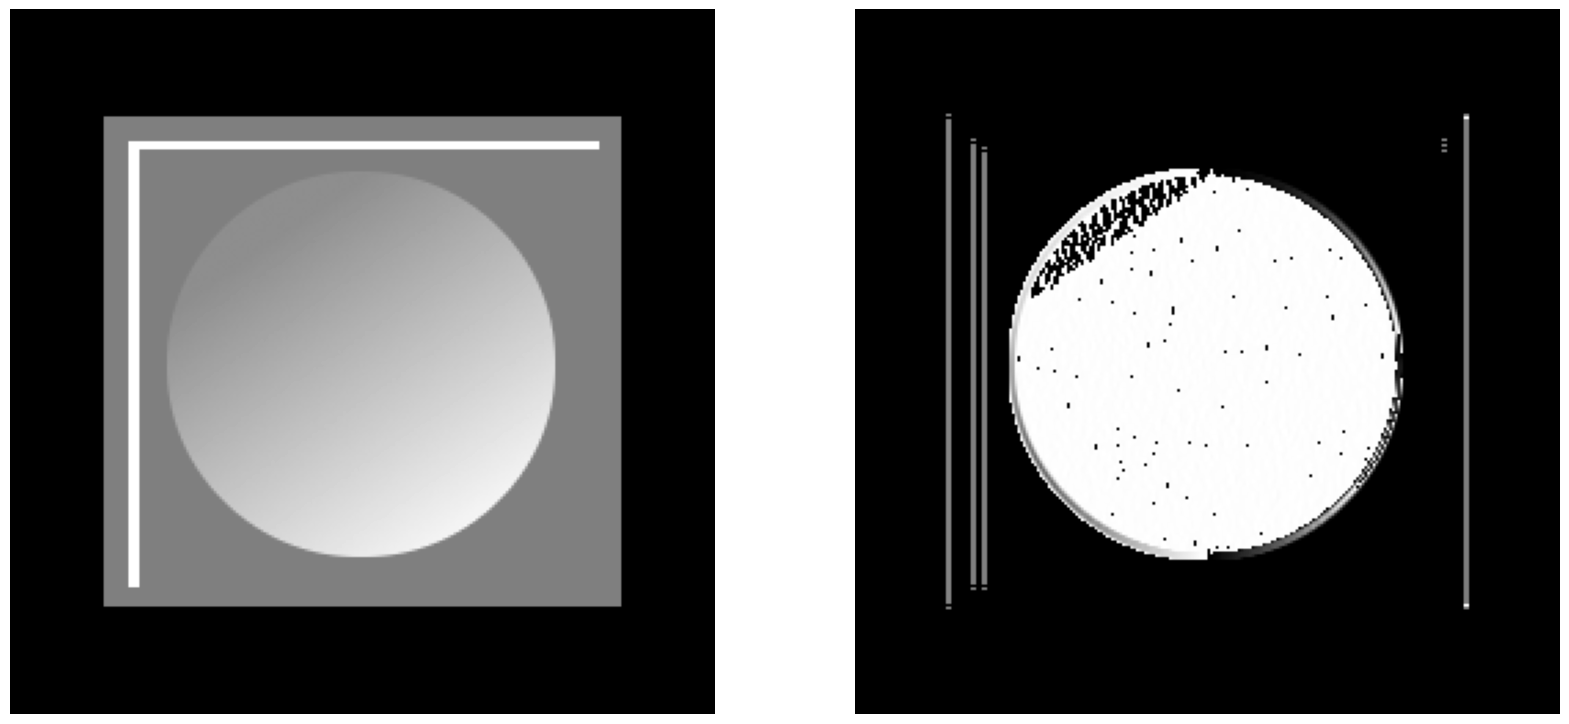

In [13]:
plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(conv_vertical, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

**Convolução para o destaque de bordas horizontais**

In [15]:
w_horizontal = np.array([[-1, -1, -1], 
                         [0, 0, 0], 
                         [1, 1, 1]])
w_horizontal

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [16]:
np.flip(np.flip(w_horizontal, 0) , 1)

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [17]:
conv_horizontal = conv(img_gray, w_horizontal)

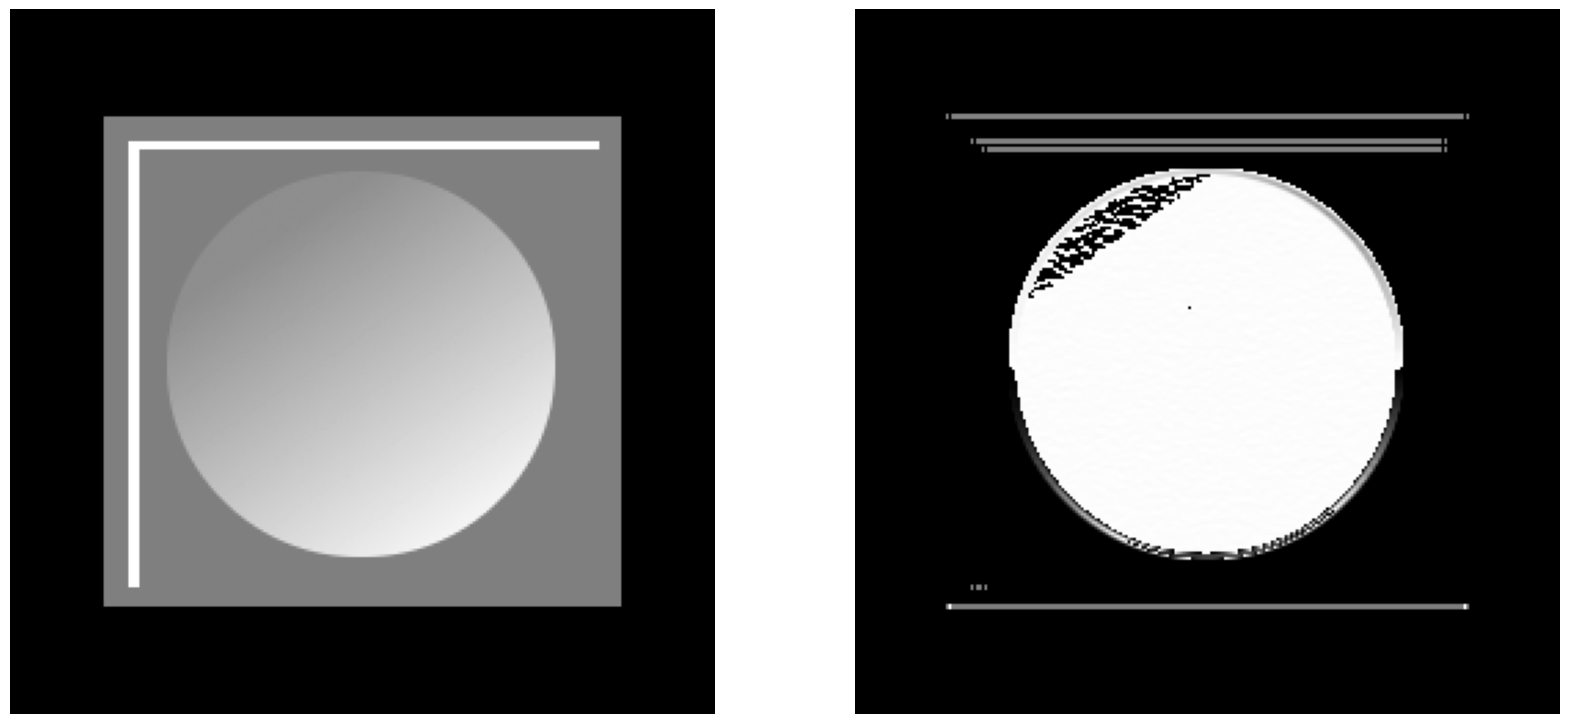

In [18]:
plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(conv_horizontal, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

## Filtros de suaviazação

Esses filtros são aplicados para  borramento e redução de ruído

In [19]:
img_gray = input_image(os.path.join("..", "Imagens", "character.png"), is_gray=True)

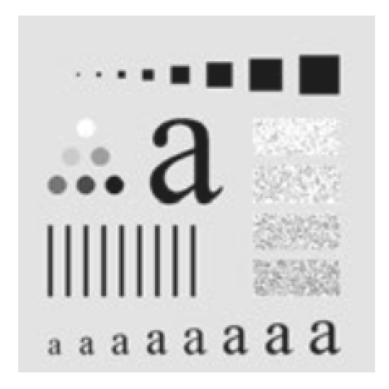

In [20]:
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

### Filtro da média

**Segundo Gonzalez e Woods (2014):**
- O filtro substitui o valor do pixel $x_i$ pela média dos seus vizinhos
- Um problema desse filtro é o borramento das bordas
- Umas da aplicação é a redução de detalhes irrelevantes

**A equação da média:**

$R_{media} = \frac{1}{n} \sum^{n}_{i} z_i$

**Equação da média ponderada**

$g(x, y) = \frac{\sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) f(x+s, y+t)}{\sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t)}$

Mascara $w$ com valores de 1

In [21]:
wa = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

In [22]:
# função que descreve a equação da média
def media_mascara(w):
    #somatório dos elementos da mascara
    n = np.sum(wa)
    #calcula a nova mascara
    w_new = (1/n)*w
    
    return w_new

In [23]:
def media_filtro(f, w_size=(3,3)):
    '''
        filtro da media
        params:
            - f: imagem de entrada
            - w_size: tamanho da mascara
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w_size
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #cria uma imagem g similar a f
    g = np.array(f, copy=True)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.mean(f[x-a: x+a+1, y-b:y+b+1]).astype(int)
    
    return g

In [24]:
# mascara com a média aritmética
w_media = media_mascara(wa)

In [25]:
w_media

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [26]:
wb = np.array([[1, 2, 1],
               [2, 4, 2],
               [1, 2, 1]])
wb

array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]])

In [27]:
w_media_b = media_mascara(wb)
w_media_b

array([[0.11111111, 0.22222222, 0.11111111],
       [0.22222222, 0.44444444, 0.22222222],
       [0.11111111, 0.22222222, 0.11111111]])

**Aplicar o filtro da media com diferentes tamanhos de mascaras**

In [28]:
img_3x3 = media_filtro(img_gray, w_size=(3,3))
img_5x5 = media_filtro(img_gray, w_size=(5,5))
img_9x9 = media_filtro(img_gray, w_size=(9,9))
img_15x15 = media_filtro(img_gray, w_size=(15,15))
img_35x35 = media_filtro(img_gray, w_size=(35,35))

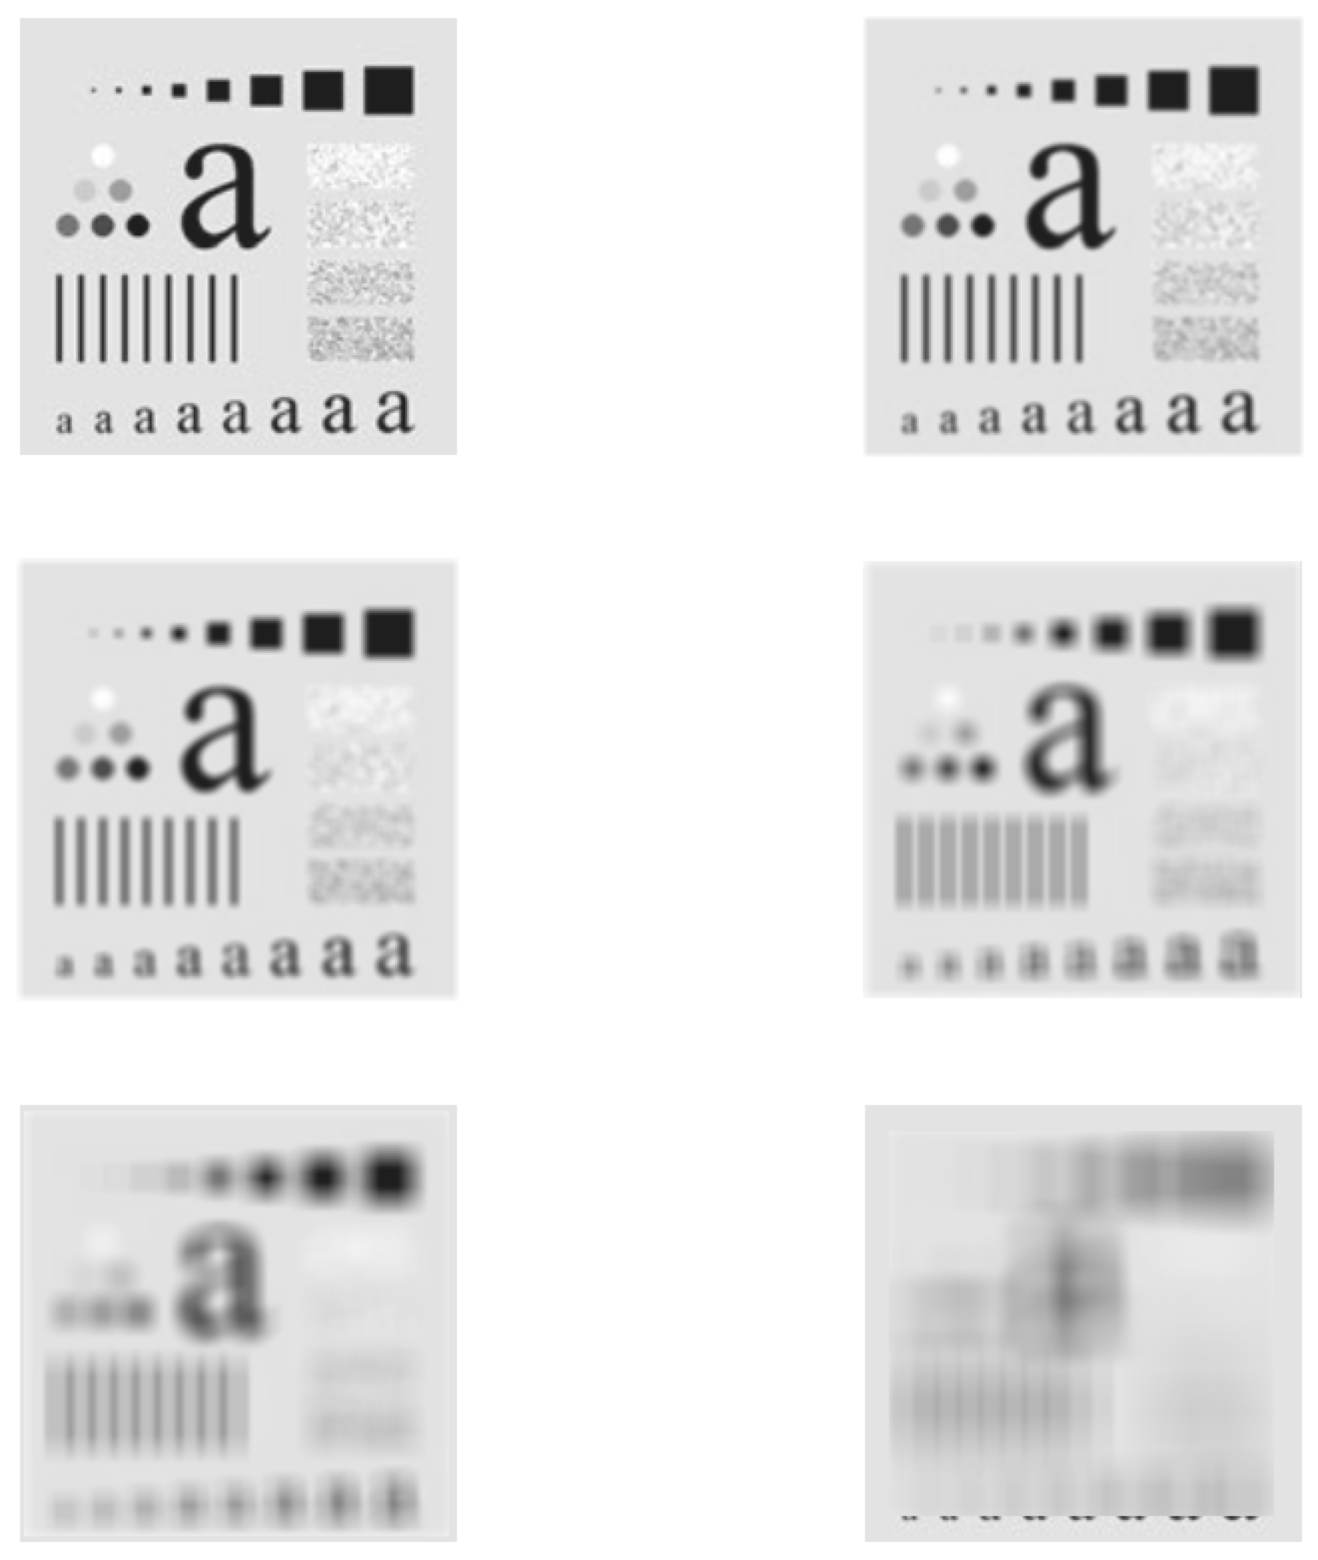

In [29]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(322)
plt.imshow(img_3x3, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(323)
plt.imshow(img_5x5, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(324)
plt.imshow(img_9x9, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(325)
plt.imshow(img_15x15, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(326)
plt.imshow(img_35x35, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

### Filtro da mediana

**A mediana tem o objetivo de eliminar ruído:**

- filtro não linear
- Ordenação e classificação dos pixels
- Para alguns tipos de ruídos aleatórios (e.g. sal e pimenta) tem ótimos resultados
- Produz borramento menor que os filtros lineares

In [30]:
def mediana_filtro(f, w_size=(3,3)):
    '''
        filtro da media
        params:
            - f: imagem de entrada
            - w_size: tamanho da mascara
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w_size
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #cria uma imagem g similar a f
    g = np.array(f, copy=True)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.median(f[x-a: x+a+1, y-b:y+b+1]).astype(int)
    
    return g

In [31]:
#importar a imagem com ruido sal e pimenta
img_gray_salt = input_image(os.path.join("..", "Imagens", "salt_and_pepper.png"), is_gray=True)

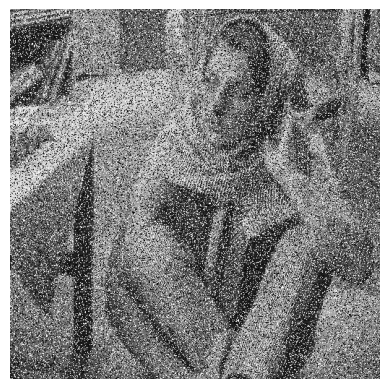

In [32]:
plt.imshow(img_gray_salt, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [33]:
img_median_3x3 = mediana_filtro(img_gray_salt, w_size=(3,3))
img_median_5x5 = mediana_filtro(img_gray_salt, w_size=(5,5))

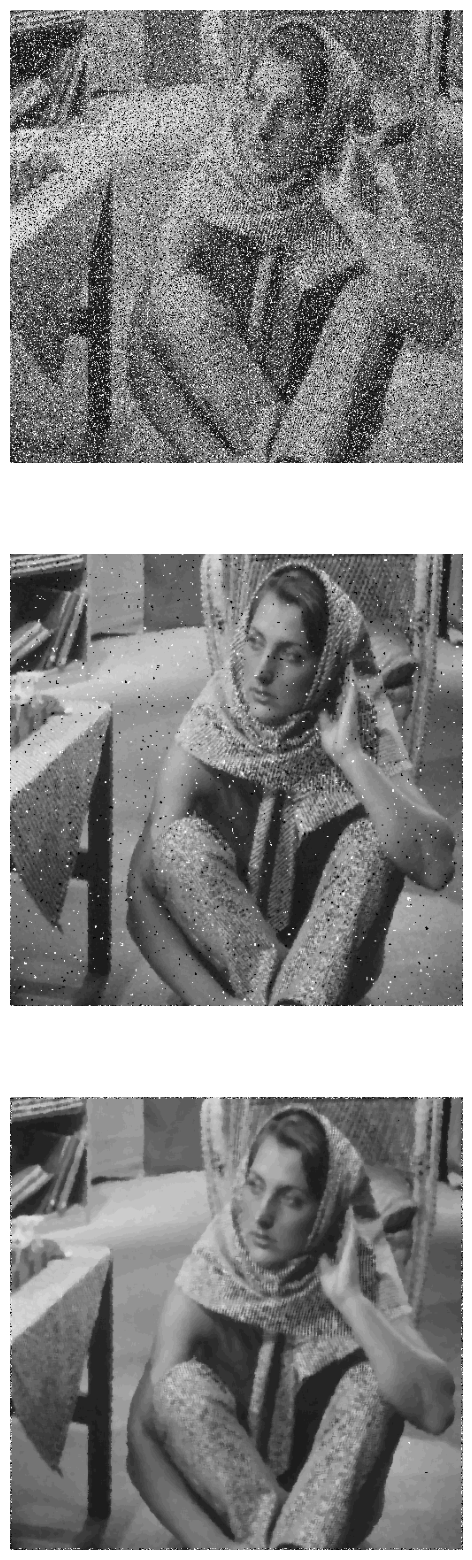

In [34]:
plt.figure(figsize=(20, 20))

plt.subplot(311)
plt.imshow(img_gray_salt, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(312)
plt.imshow(img_median_3x3, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(313)
plt.imshow(img_median_5x5, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

**Tarefa:** A imagem anterior apresenta um problema. O objetivo é implementar sua versão da convolução e aplicar filtro da mediana para corrigir esse problema.

## Filtros de aguçamento

 - Salientar transições de intensidade
 - Aumentar a nitidez da imagem
 - **Aplicações:** impressão digital, imagens médicas, inspeção industrial

### Definir a imagem utilizada da lua

In [93]:
img_moon = input_image(os.path.join("..", "Imagens", "Moon.jpg"), is_gray=True)

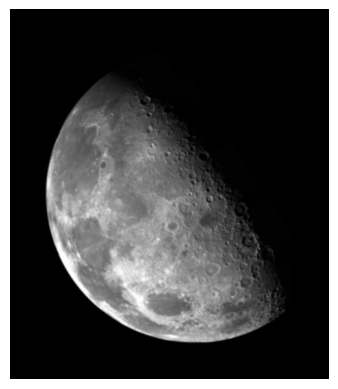

In [94]:
plt.imshow(img_moon, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

### Laplace

- Segunda derivada -- utilizada para construir a máscara
- Invariante a rotação
- Detecção de bordas horizontais e verticais

In [96]:
def laplace_filter(f, w):
    '''
        Filtro laplaciano
        params:
            - f: (np.array) imagem de entrada
            - w: mascara de convolução
        return:
            - imagem g com convolução
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w.shape
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #flip filtro
    #cria uma imagem g similar a f
    g = np.copy(f)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.abs(np.sum(np.multiply(f[x-a: x+a+1, y-b:y+b+1], w)))
    
    return g.astype(np.uint8)

In [97]:
#mascara filtro laplaciano
lap_w = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])

In [98]:
lap_filter = laplace_filter(img_moon, lap_w)

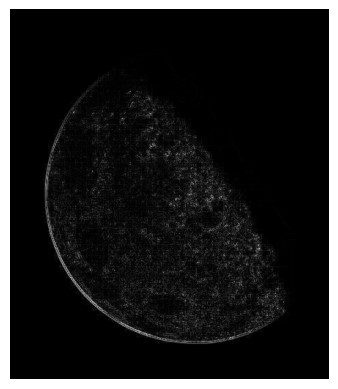

In [99]:
plt.imshow(lap_filter, cmap="gray")
plt.axis("off")
plt.show()

### Unsharp mask

1 - Borrar a imagem original

2 - Subtrair a imagem borrada da original -> resultante é a máscara

3 - Adicionar a máscara a imagem original

--------------------------

1 - $f_{blur}(x,y) = mean(f(x, y)) \text{ ou } Gaussian(f(x, y))$

2 - $g_{mask}(x,y) = f(x,y) - f_{blur}(x,y)$

3 - $g(x,y) = f(x, y) + k* g_{mask}(x,y)$

In [116]:
img_placa = input_image(os.path.join("..", "Imagens", "Placa.png"), is_gray=True)

In [117]:
#Borrar a imagem original
blur_img = media_filtro(img_placa, w_size=(5,5))

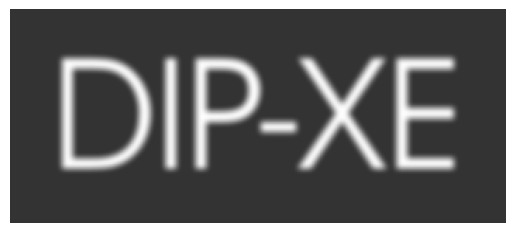

In [118]:
plt.imshow(blur_img, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [119]:
#criar mascara
g_mask = img_placa - blur_img

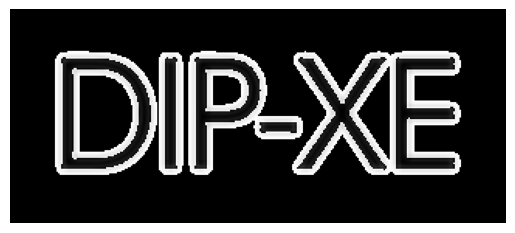

In [120]:
plt.imshow(g_mask, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [121]:
#calcular a nova image com o fator de ajuste k > 0 e k < 1
k = 0.2
g_unsharp = img_placa + k * g_mask 

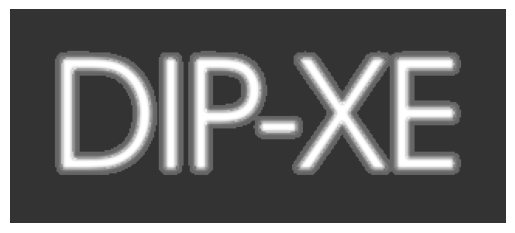

In [122]:
plt.imshow(g_unsharp, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

### High-Boost

O valor de k > 1

In [124]:
#calcular a nova image com o fator de ajuste k > 0 e k < 1
k = 2
g_high = img_placa + k * g_mask 

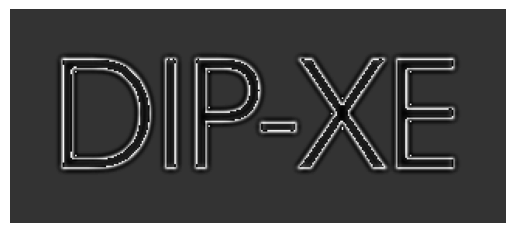

In [127]:
plt.imshow(g_high, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()